In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
import sys
if not sys.warnoptions:
    warnings.simplefilter('ignore')
np.random.seed(42)

# Preprocessing & models
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
rfm = pd.read_csv("C:/Users/HARDEEP/OneDrive/Docs/Automobile-Sales-Logistics/Data/Cleaned-Data/rfm_output.csv")

In [12]:
rfm

,customername,recency_days,frequency_orders,monetary_sales,avg_totalmsrp,n_unique_products,shipping_reliability,main_country,main_city,main_productline,main_dealsize,R_score,F_score,M_score,RFM_score,value_tier,ship_bucket,value_ship_segment,cluster_kmeans,cluster_label
0,"AV Stores, Co.",197,3,157807.81,3194.588235,37,1.000000,UK,Manchester,Vintage Cars,Medium,2,1,1,4,Low Value,Reliable,Low Value – Stable/Upsell,0,Core Stable Buyers
1,Alpha Cognac,65,3,70488.44,3357.450000,20,1.000000,France,Toulouse,Ships,Medium,4,1,3,8,Mid Value,Reliable,Mid Value – Stable,0,Core Stable Buyers
2,Amica Models & Co.,266,2,94117.26,3511.230769,26,1.000000,Italy,Torino,Vintage Cars,Small,1,3,2,6,Mid Value,Reliable,Mid Value – Stable,0,Core Stable Buyers
3,"Anna's Decorations, Ltd",84,4,153996.13,3325.000000,41,1.000000,Australia,North Sydney,Classic Cars,Small,3,1,1,5,Low Value,Reliable,Low Value – Stable/Upsell,0,Core Stable Buyers
4,Atelier graphique,189,3,24179.96,3572.000000,7,1.000000,France,Nantes,Classic Cars,Medium,2,2,4,8,Mid Value,Reliable,Mid Value – Stable,0,Core Stable Buyers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,"Vida Sport, Ltd",276,2,117713.56,3931.677419,17,1.000000,Switzerland,Gensve,Classic Cars,Medium,1,4,2,7,Mid Value,Reliable,Mid Value – Stable,0,Core Stable Buyers
85,Vitachrome Inc.,209,3,88041.26,3282.560000,25,1.000000,USA,NYC,Motorcycles,Small,2,3,2,7,Mid Value,Reliable,Mid Value – Stable,0,Core Stable Buyers
86,"Volvo Model Replicas, Co",195,4,75754.88,3862.473684,19,0.684211,Sweden,Lule,Classic Cars,Medium,2,1,3,6,Mid Value,Critical,Mid Value – Fulfilment Risk,1,Value Buyers with Shipping Issues
87,West Coast Collectables Co.,489,2,46084.64,3699.461538,13,1.000000,USA,Burbank,Vintage Cars,Medium,1,4,4,9,High Value,Reliable,High Value – Stable,3,Ultra VIP Heavy Buyers


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
features = [
    'recency_days',
    'frequency_orders',
    'n_unique_products',
    'avg_totalmsrp',
    'shipping_reliability'
]

X = rfm[features]                 # NO SCALING 
y = rfm['monetary_sales']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score (Unscaled Model): {r2:.3f}")
print(f"RMSE (Unscaled Model): {rmse:,.2f}")


R² Score (Unscaled Model): 0.971
RMSE (Unscaled Model): 23,200.08


In [7]:
coef_table_unscaled = pd.DataFrame({
    'Feature': features,
    'Business_Coefficient': lr.coef_
}).sort_values(by='Business_Coefficient', ascending=False)

coef_table_unscaled


,Feature,Business_Coefficient
1,frequency_orders,23686.025880
2,n_unique_products,3267.270327
4,shipping_reliability,2981.406743
0,recency_days,66.611916
3,avg_totalmsrp,15.542877


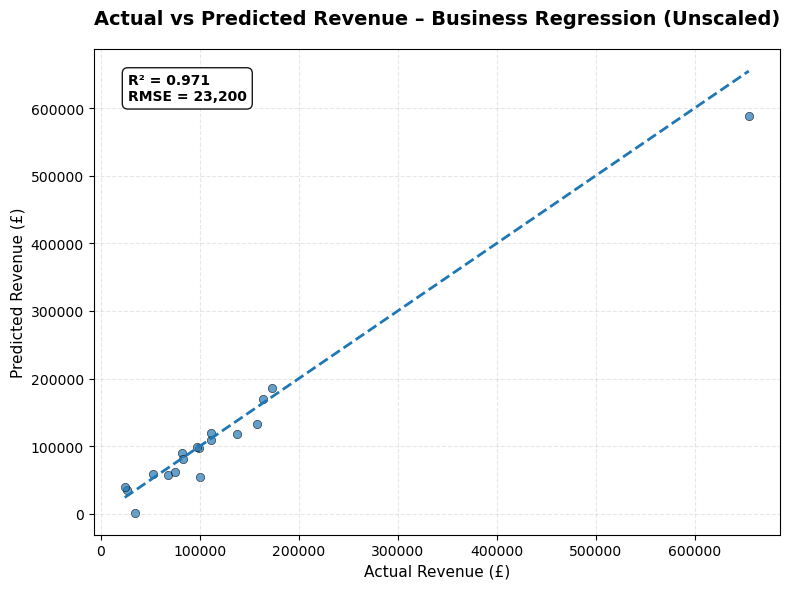

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# ✅ Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

plt.figure(figsize=(8, 6))

# ✅ Premium scatter
plt.scatter(
    y_test,
    y_pred,
    alpha=0.7,
    edgecolor='black',
    linewidth=0.5
)

# ✅ 45-degree perfect prediction line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle='--',
    linewidth=2
)

# ✅ Labels & Title
plt.xlabel("Actual Revenue (£)", fontsize=11)
plt.ylabel("Predicted Revenue (£)", fontsize=11)

plt.title(
    "Actual vs Predicted Revenue – Business Regression (Unscaled)",
    fontsize=14,
    fontweight='bold',
    pad=18
)

# ✅ R² & RMSE Annotation Box (Executive Style)
plt.text(
    0.05, 0.95,
    f"R² = {r2:.3f}\nRMSE = {rmse:,.0f}",
    transform=plt.gca().transAxes,
    fontsize=10,
    fontweight='bold',
    verticalalignment='top',
    bbox=dict(
        boxstyle="round,pad=0.4",

        facecolor="white",
        edgecolor="black",
        alpha=0.9
    )
)

# ✅ Clean grid
plt.grid(alpha=0.3, linestyle='--')

plt.tight_layout()


plt.savefig(
    "C:/Users/HARDEEP/OneDrive/Docs/Automobile-Sales-Logistics/Output/Visuals_Plots/Actual vs Predicted Revenue.png",
    dpi=300,
    bbox_inches="tight"
)


plt.show()



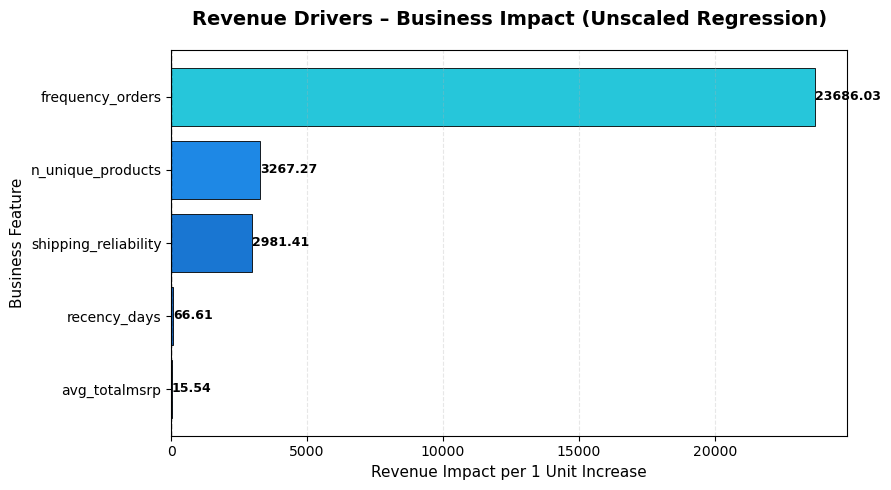

In [15]:
plt.figure(figsize=(9, 5))

# Sort coefficients
coef_sorted = coef_table_unscaled.sort_values(by='Business_Coefficient')

# Premium Corporate Gradient Colors (Blue → Teal)
premium_colors = [
    "#0D47A1",  # Deep Blue
    "#1565C0",
    "#1976D2",
    "#1E88E5",
    "#26C6DA",
    "#00ACC1"
]

# Make sure colors match number of bars
colors = premium_colors[:len(coef_sorted)]

plt.barh(
    coef_sorted['Feature'],
    coef_sorted['Business_Coefficient'],
    color=colors,
    edgecolor='black',
    linewidth=0.6
)

# ✅ Professional Title & Labels
plt.title(
    "Revenue Drivers – Business Impact (Unscaled Regression)",
    fontsize=14,
    fontweight='bold',
    pad=18
)

plt.xlabel("Revenue Impact per 1 Unit Increase", fontsize=11)
plt.ylabel("Business Feature", fontsize=11)

# ✅ Zero reference line (Consulting standard)
plt.axvline(0, color='black', linewidth=1, linestyle='--', alpha=0.7)

# ✅ Value labels on bars
for i, v in enumerate(coef_sorted['Business_Coefficient']):
    plt.text(
        v,
        i,
        f"{v:.2f}",
        va='center',
        fontsize=9,
        fontweight='bold'
    )


plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()


plt.savefig(
    "C:/Users/HARDEEP/OneDrive/Docs/Automobile-Sales-Logistics/Output/Visuals_Plots/Revenue Drivers.png",
    dpi=300,
    bbox_inches="tight"
)


plt.show()


In [10]:
coef_table_unscaled = pd.DataFrame({
    'Feature': features,
    'Business_Coefficient': lr.coef_
}).sort_values(by='Business_Coefficient', ascending=False)

coef_table_unscaled.to_csv("regression_coefficients_unscaled.csv", index=False)


In [11]:
coef_table_unscaled['Abs_Impact'] = coef_table_unscaled['Business_Coefficient'].abs()
coef_table_unscaled.to_csv("regression_coefficients_unscaled.csv", index=False)
